# Crime and Punishment Exercise

**AUTHOR: Nolan MacDonald**

## Prompt

- You should make changes and tweaks to the code to explore how it works.  Use this opportunity to explore how Python works or delve deeper into NLTK or another library
- Write a few sentences describing one extension or attempted extension you made to the code. The code change description should be one paragraph that details what changes were made and should be between 100 and 150 words. You may post the change description as a comment at the beginning of your code, or submit the write-up in a separate document.  Make sure you denote in the code submission where the changes occurred by commenting out code change areas, highlighting changes, or referring to the command lines in your description. 

You will submit the following:

Original code output (Jupyter notebook code and output from that code)
Your code change and output from that code change
Your code change description (this should be between 100 to 150 words)
An example of what the change description should look like:

```
# CHANGE DESCRIPTION
# 100-150 words on the changes I’ve made, including a reference to which initial command I’ve changed >
# END OF CHANGE DESCRIPTION
```

To submit the Jupyter notebook code and output, download it from Jupyter as either a PDF or HTML document, and then upload this into Canvas. You can convert the notebook to PDF by <File>then<download as pdf. >or download via Latex as PDF">.  In your submission, please note as clearly as possible for the grader exactly what you've changed. 

*Files must be in one of the following formats: pdf, doc, txt, html

## Solution

To determine the quantity of unique words, tokenize the text first with `word_tokenize()`.
Next, I used a `set` to identify the unique words by using the tokens.
The `set` makes it easy because a set is created from the tokens to filter out duplicates, 
allowing for the count of unique words to be displayed.
This was a relatively simple way to do it compared to the solutions.
My answer was not exactly the same as the solution (11,159 vs. solution of 11,252 unique words), but it was close.

Next, I used `nltk` frequency distribution to record how many times a word was used.
Using the tokens, it showed the words as well as punctuation like commas and periods. A plot was created to get a visualization of the frequency of the most common words using `matplotlib`. The common words were typically "the", "and", "to" and not necessarily unique.
To expand upon this,  I converted the tokens to lowercase and filtered non-alphabetic tokens so there was no punctuation.
Next, I used `nltk.corpus` and `stopwords` for stopword removal.
This removed common words like "the" and "and" that appeared frequently.
Identifying the most common words after stopword removal resulted in much more unique words such as "raskolnikov" (most common), "one" and "would". Again, a word frequency plot for visualization was created with `matplotlib`.

Cells below show the examples as well as my solutions. I put markdown cells to describe my process as well as put `nltk` documentation links.


## Import Modules

In [2]:
from bs4 import BeautifulSoup
import nltk
import requests
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk_data_dir = "/Users/nmacdonald/projects/INTA6450/crime-and-punishment/nltk_data/"
nltk.data.path.append(nltk_data_dir)
nltk.download("punkt_tab", download_dir="nltk_data")
nltk.download("words", download_dir="nltk_data")
nltk.download("book", download_dir="nltk_data")
nltk.download("stopwords", download_dir="nltk_data")

[nltk_data] Downloading package punkt_tab to nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package words to nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]   

True

# Crime and Punishment

## Download

I refined the code so a step-by-step approach is taken to obtaining the text.

- URL is separated into a string
- Use the URL to request fetching the text from the URL
- Utilize the response to properly convert to text
- Next, I print out the first 100 characters. Since I am using a more recent version of Python, I can use f-strings to query my code inside of a string
- After, I print the length of the text again using f-strings
- Using the text, I tokenize the words with `nltk.word_tokenize()`
- Confirm by printing the first 10 tokens

In [3]:
url = "http://inta.gatech.s3.amazonaws.com/crime_and_punishment.txt"
response = requests.get(url)

text = response.text

# Here are the first 100 characters of Project Gutenberg's crime and punishment
print(f"\nThe first 100 characters of Crime and Punishment include: \n{text[0:100]}")
print(f"\nLength of text: {len(text)}")

tokens = nltk.word_tokenize(text)

print(f"\nThe first 10 tokens include:\n{tokens[:10]}")


The first 100 characters of Crime and Punishment include: 
ï»¿The Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky

This eBook is for th

Length of text: 1177120

The first 10 tokens include:
['ï', '»', '¿The', 'Project', 'Gutenberg', 'EBook', 'of', 'Crime', 'and', 'Punishment']


Create an NLTK text object, in case you want to use some of the nltk.text functions.

[NLTK Documentation](http://www.nltk.org/api/nltk.html#module-nltk.text)

In [4]:
text = nltk.Text(tokens)
# Create an NLTK text object, in case you want to use some of the nltk.text functions
# http://www.nltk.org/api/nltk.html#module-nltk.text
print(text[2])

¿The


# Unique Words

How many unique words are there in Crime and Punishment?

See the example below for reference.

My own code is listed under Solution.

## Example

In [5]:
# To figure out how many of these words are English words, we need an english dictionary.
# One is included with nltk, available as a list below:
english = nltk.corpus.words.words("en")

print(english[0:15])
# load an english dictionary (i.e. list of english words) from nltk

english = [w.lower() for w in english]
# Then make sure all words are lowercase - so we would accept 'aaron' as a word, no matter the capitalization

print(english[0:15])

['A', 'a', 'aa', 'aal', 'aalii', 'aam', 'Aani', 'aardvark', 'aardwolf', 'Aaron', 'Aaronic', 'Aaronical', 'Aaronite', 'Aaronitic', 'Aaru']
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaronic', 'aaronical', 'aaronite', 'aaronitic', 'aaru']


In [6]:
es = set(english)
ws = set(tokens)
# create python sets out of the dictionary and tokens, in case you want to use python set operations
# https://docs.python.org/2/library/sets.html

## Solution

To determine the quantity of unique words, tokenize the text first with `word_tokenize()`.
Next, I used a `set` to identify the unique words by using the tokens.
The `set` makes it easy because a set is created from the tokens to filter out duplicates, 
allowing for the count of unique words to be displayed.
This was a relatively simple way to do it compared to the solutions.
My answer was not exactly the same, but it was close.


In [7]:
# Call the downloaded book text first in case the variable was overwritten
text = response.text

# Tokenize the text
tokens = nltk.word_tokenize(text)

# Determine the number of unique words
unique_words = set(tokens)
print(f"\nNumber of unique words: {len(unique_words)}")


Number of unique words: 11159


## Freqency of Words

How many times were the most common words used?

- Used `nltk` frequency distribution to record how many times a word was used
    - [FreqDist Documentation](https://www.nltk.org/api/nltk.probability.html#nltk.probability.FreqDist)
- Using the tokens, it showed the words as well as punctuation like commas and periods. A plot was created to get a visualization of the frequency of the most common words using `matplotlib`.
- To remove the punctuation, I used `nltk.corpus` and `stopwords` for stopword removal. This removed common words like "the" and "and" that appeared frequently.
- Identifying the most common words after stopword removal resulted in much more unique words such as "raskolnikov" (most common), "one" and "would". Again, a word frequency plot for visualization was created with `matplotlib`.

In [8]:
# Frequency distribution of words
# Tokenize the text
tokens = nltk.word_tokenize(text)
frequency = nltk.FreqDist(tokens)
# Get the 20 most common words
common = frequency.most_common(20)
print(f"Most common words: {common}")

Most common words: [(',', 16176), ('.', 9854), ('the', 7431), ('and', 6279), ('to', 5276), ('a', 4469), ('I', 4399), ("''", 4192), ('of', 3847), ('``', 3739), ('he', 3524), ('you', 3500), ('in', 3097), ('that', 3065), ('it', 2941), ('was', 2834), ('!', 2364), ('?', 2275), ('his', 1999), ('at', 1945)]


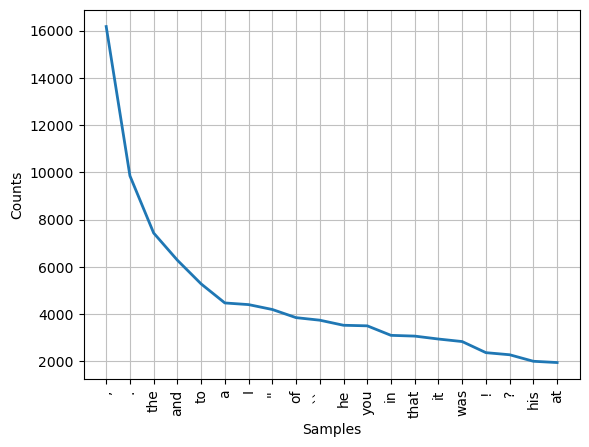

In [10]:
# Plot the frequency distribution of the 20 most common words
frequency.plot(20, cumulative=False)
plt.show()

In [17]:
# Get the list of English stopwords
stop_words = set(stopwords.words("english"))

# Get the words from the text by tokenizing
tokens = nltk.word_tokenize(text)

# Convert to lowercase and filter non-alphabetic tokens
words = [word.lower() for word in tokens if word.isalpha()]

# Filter out stopwords from the tokenized words
filtered_words = [word for word in words if word not in stop_words]

# Check frequency distribution after removing stopwords
frequency_filtered = nltk.FreqDist(filtered_words)
common_filtered = frequency_filtered.most_common(20)
print(f"Most common words: {common_filtered}")

Most common words: [('raskolnikov', 784), ('one', 642), ('would', 615), ('could', 541), ('know', 530), ('said', 519), ('man', 479), ('come', 477), ('like', 451), ('though', 445), ('sonia', 402), ('see', 386), ('time', 384), ('go', 366), ('went', 356), ('razumihin', 347), ('even', 340), ('dounia', 323), ('well', 322), ('must', 316)]


<Axes: xlabel='Samples', ylabel='Counts'>

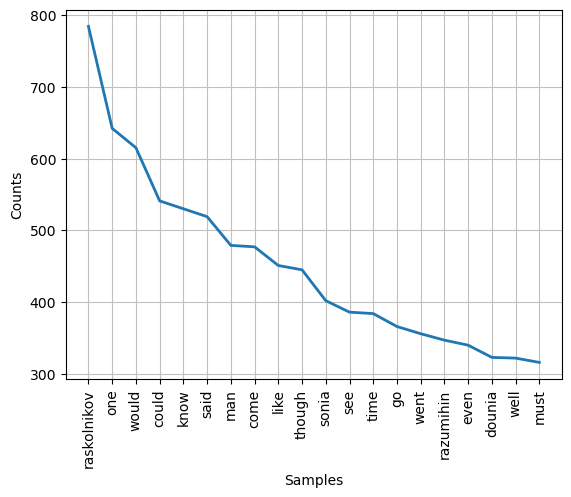

In [18]:
# Plot the filtered words with stopwords
frequency_filtered.plot(20, cumulative=False)